## Predicting heart disease using machine Learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes


We are going to take the follow approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

The original data came from Cleveland data from the UCI Machine Learning Repository. There is also a version available in Kaggle

UCI: https://archive.ics.uci.edu/ml/datasets/heart+Disease

Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project


## 4. Features

Information of the data:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

#### We are going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [2]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Loading Data

In [3]:
df= pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

## Data Exploration

1. What questions are you trying to solve?
2. What kind of data do we have?
3. What is missing in from the data?
4. Where are the outliers and should we take them into account?
5. How can you add, change or remove features to get more out of your data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Find out how many of each class there is
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

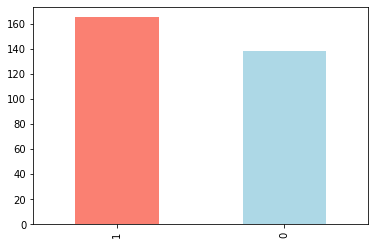

In [7]:
# Bar graph of each class
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# How many missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Data description: Mean, STD, Min, Max
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequecny according to Sex 

In [11]:
df["sex"].value_counts()  # lot more males than females in dataset

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column wth sex column
pd.crosstab(df["target"], df["sex"]) # women has a higher chance of having heart_disease

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

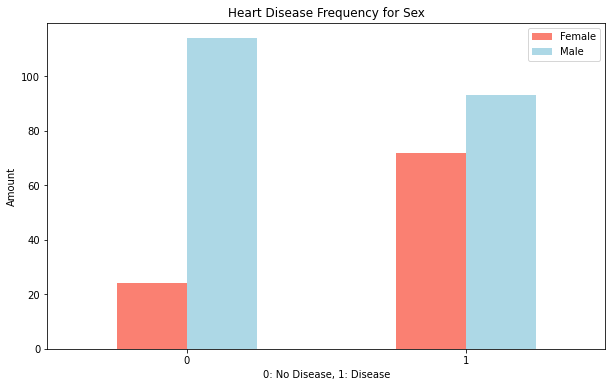

In [13]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0: No Disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

### Age vs. Max Heart Rate for Heart Disease

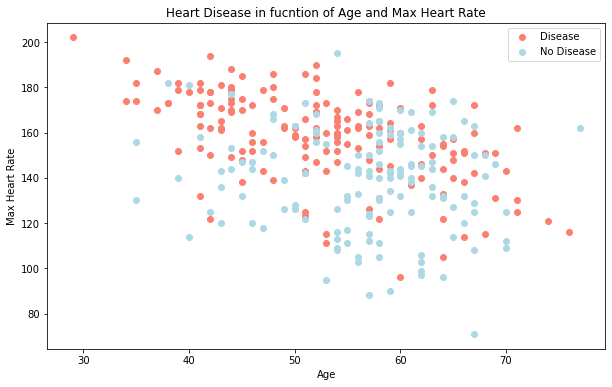

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter plot with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], color=["salmon"])

#Scatter plot with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], color=["lightblue"])

# Adding labels and titles
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

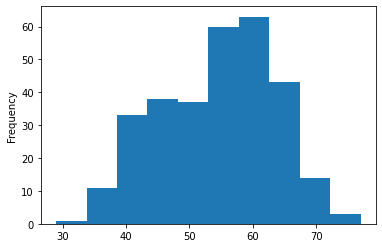

In [15]:
# Distribution of age column using a histogram
df.age.plot.hist(); #majorty of the age in the dataset is betwene 50 and 60 yrs

### Heart Disease Frequency  per Chest Pain Type

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

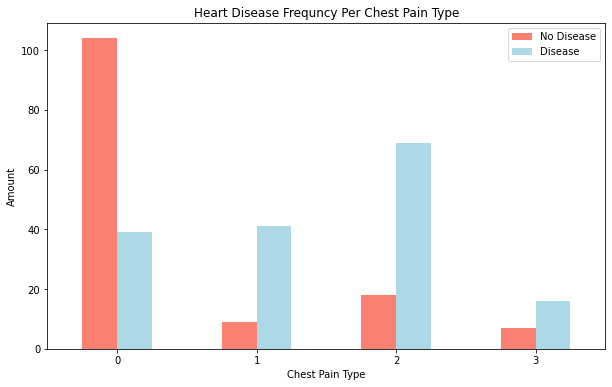

In [17]:
# Making crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6), color=['salmon',"lightblue"])
plt.title("Heart Disease Frequncy Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


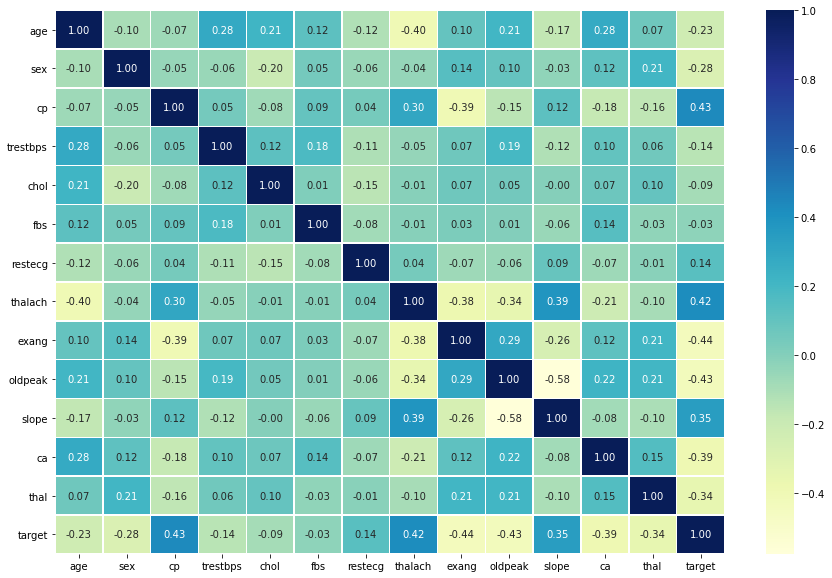

In [19]:
# Make Correlation matrix more visual
corr_matrix=df.corr()
fig , ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt="0.2f", cmap="YlGnBu");

## 5. Modelling

In [20]:
# Split data into X and y
X=df.drop("target", axis=1)
y=df.target

In [21]:
# Split data into training and test set
np.random.seed(42)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape, y_train.shape

((242, 13), (242,))

We have our data split and now we need to find which machine learning model to use


We are going to use 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForestClassifier


In [23]:
# Put models in a dictionary and test which one is the best
models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

# Create a function to fit and score each model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ML models
    
    models: dictionary of different Scikit-Learn ML models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training data (target values)
    y_test: test data(predictions)
    """
    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores={}
    
    #Loop through the models and fit the model to data
    for name, model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and save its score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [24]:
# Calling fit_and_score function
model_scores= fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\adith\Anaconda3\envs\Project1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

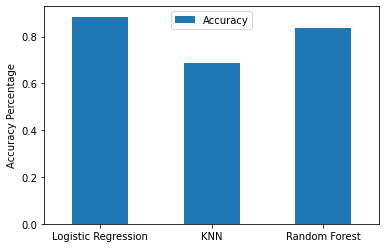

In [25]:
model_compare=pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar() # Best model is Logistic Regression
plt.ylabel("Accuracy Percentage")
plt.xticks(rotation=0)

Now we have a baseline model.

Lets look at the following:
    1. Hyperparameter tuning
    2. Feature importance
    3. Confusion matrix
    4. Cross-validation
    5. Precision
    6. Recall
    7. F1 score
    8. Classification report
    9. ROC curve
    10. Area under the curece(AUC)

## Hyperparameter tuning

In [26]:
#Lets tune KNN first

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update training score list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update test score list
    test_scores.append(knn.score(X_test,y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on test data: 75.41%


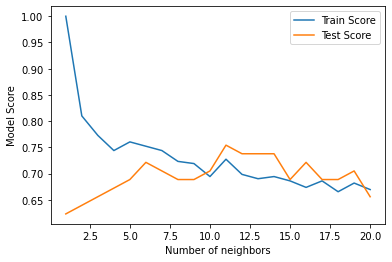

In [29]:
# Visualize training and test scores
plt.plot(neighbors,train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Max KNN score on test data: {max(test_scores)*100:0.2f}%")

##### Even though we changed  n_neighbors parameter, KNN is still not an efficient as other models
##### So lets discard it

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* Logistic Regression model
* RandomForestClassifier model

...using RandomizedSearchCV

In [30]:
#Create a hyperparameter grid for Logistic Regression 
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver": ["liblinear"]}

#Create hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameter grid setup for each of our models, lets tune them using RandomizedSearchCV

In [31]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter searc for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
#Best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we have tuned Logistic Regression, lets do the same for Random Forest Classifier

In [34]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#Fit randomhyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
#Finding best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

## Now we are going to try GridSearchCV

Since our LogisticRegression model provides the best score even after RandomizedSearchCV, we are going to use GridSearchCV on Logistic Regression to tune it to the best

In [37]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True) #no n_iter like RandomizedSearchCV

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

First make predictions and then we can compare it with the truth labels and evaluate our model with confusion matrix, ROC curve and AUC score etc.

In [40]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

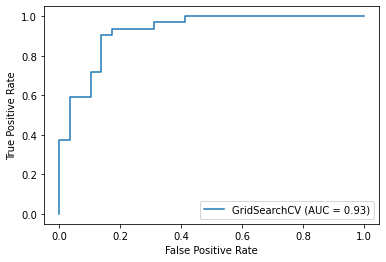

In [41]:
#Plot ROC curve and calculate the AUC metric...always evaluate on test set
plot_roc_curve(gs_log_reg,X_test,y_test)

In [42]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


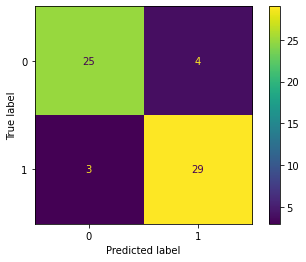

In [43]:
#Visualize confusion matrix
plot_confusion_matrix(gs_log_reg,X_test,y_test)

Lets get a classification report as well as a cross-validated precision, recall and f1-core

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We are going to calculate precision, recall, and f1-score of our model using cross-validation and to do so, we will be using `cross_val_score` 

In [45]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
#Create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [47]:
#Cross-validated accuracy
cv_accuracy=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_accuracy)
cv_acc

0.8446994535519124

In [48]:
#Cross-validated precision
cv_prec=np.mean(cross_val_score(clf,X,y,cv=5,scoring="precision"))
cv_prec

0.8207936507936507

In [49]:
#Cross-validated recall
cv_recall=np.mean(cross_val_score(clf,X,y,cv=5,scoring="recall"))
cv_recall

0.9212121212121213

In [50]:
#Cross-validated f1
cv_f1=np.mean(cross_val_score(clf,X,y,cv=5,scoring="f1"))
cv_f1

0.8673007976269721

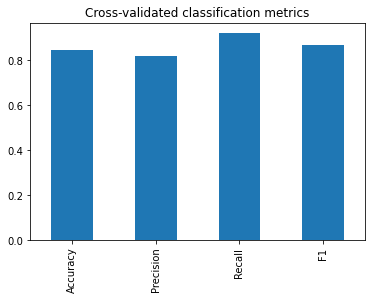

In [51]:
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                        "Precision": cv_prec,
                        "Recall": cv_recall,
                        "F1": cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

## Feature Importance

It tells us which features contributed the most to the outcome of the model

Each ML model has its own unique feature importance

For now, we are going to find feature importance for our LogisticRegression model

In [52]:
#Fit an instance of Logistic Regression
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [53]:
#Check coefficients
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [54]:
#Match coeff of features to columns on dataset
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

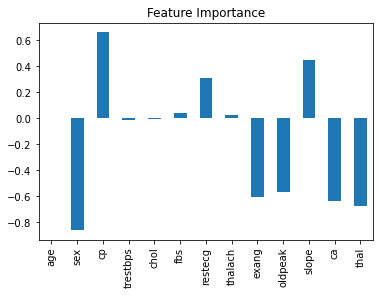

In [60]:
#Visualize the feature importance
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

# 6. Experimentation

Things to do to improve ML model:
* Maybe use a new model like XGBoost, CatBoost or Tensorflow
* Collect more data
* Little more Hyperparameter tuning
